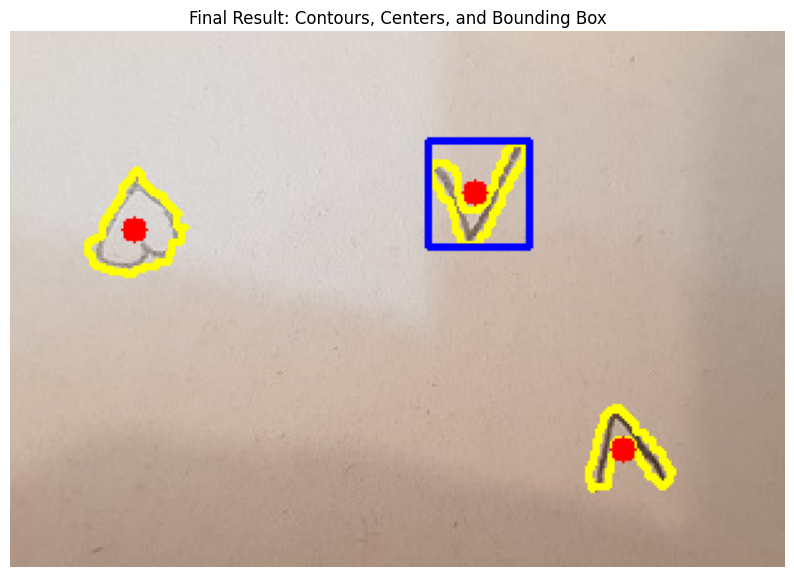

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load image
image = cv2.imread("adad.jpg")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to remove noise
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0)

# Step 3: Adaptive thresholding
thresh = cv2.adaptiveThreshold(
    gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 1
)

# Step 4: Morphological closing
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Step 5: Find contours
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Select 5 largest contours
largest_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

# Step 7: Remove 2 rightmost contours
bounding_boxes = [cv2.boundingRect(cnt) for cnt in largest_contours]
rightmost_ids = {id(cnt) for cnt, box in sorted(zip(largest_contours, bounding_boxes), key=lambda item: item[1][0], reverse=True)[:2]}
remaining_contours = [cnt for cnt in largest_contours if id(cnt) not in rightmost_ids]

# Step 8: Draw remaining contours and their centers
output_image = image.copy()
centers_with_contours = []

for cnt in remaining_contours:
    cv2.drawContours(output_image, [cnt], -1, (0, 255, 255), 2)  # Yellow contour
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centers_with_contours.append(((cX, cY), cnt))
        cv2.circle(output_image, (cX, cY), 5, (0, 0, 255), -1)  # Red center

# Step 9: Find the top-rightmost center
if centers_with_contours:
    top_rightmost = max(centers_with_contours, key=lambda item: item[0][0] - item[0][1])
    (cX, cY), top_cnt = top_rightmost
    x, y, w, h = cv2.boundingRect(top_cnt)
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue bounding box

# Step 10: Show result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Final Result: Contours, Centers, and Bounding Box")
plt.show()
